# Unit 8 Lecture 2 - Artificial Intelligence: Supervised Learning 1

CAI 4823: Artificial Intelligence for Industrial Engineers<br>
University of Central Florida


## Notebook Learning Objectives
After studying this notebook students should be able to:
- Undertand basic concepts on artificial intelligence and machine learning
- Develop supervised learning models using Scikit-Learn
- K-nearest neighbor algorithm
- Using external data "LoanStats3a.csv" and "dataset_complete.pkl"

# Overview

Artificial intelligence (AI) is making its way into all industries. Companies that are not already exploiting the benefits of the "AI revolution" are frantically upgrading their business models to remain competitive. No doubt artificial intelligence is here to stay. The US government and private sector are investing heavily to remain the world leader on this crucial field.

The AI that is currently used in industry, it is based on statistical methods and artificial intelligence algorithms developed on the 70's and 80's. It is just now that those technologies have come to age, in part, thanks to the availability of large amounts of data and the unprecedented, inexpensive and readily available computational power. Of course, algorithms have continually become more efficient and powerful. An example of these advances is **deep learning**. Deep learning have brought orders of magnitude improvement in accuracy compared with traditional learning algorithms. For more information about deep learning see <a href="https://arxiv.org/pdf/1404.7828.pdf">reference 1</a> and for a Python library for deep learning see <a href="https://pytorch.org">reference 2</a>. Current AI research focuses in going beyond statistical learning and patern recognition (where deep learning is the reigning king) into the more challenging problem of infusing AI  with _common-sense reasoning_, with the ability to explain its actions or decisions, so called _explainability_, and in general, making AIs become better _human partners_. For an example of this **third wave of AI** please see <a href="https://www.youtube.com/watch?time_continue=2564&v=7ROelYvo8f0">reference 4</a>.

This class have provided you with the programming, data, and statistical foundations needed to understand a particular type of artificial intelligence: machine learning. Machine learning comes in two main flavors: 
- supervised learning
- unsupervised learning

A supervised learning algorithm work by learning by example and with a "supervisor" that tell the algorithm when it got it right and when it made a mistake. After the supervisor "trains" the algorithm using many examples (training data set), then the algorithm is presented with a never seen before example (test data set) in order to test if the algorithm was able to "learn" from the training data.

We will use the Python library **Scikit-Learn** (see <a href="http://scikit-learn.org/stable/index.html">reference 3</a>). This library is a comprehensive and state-of-the-art collection of machine learning algorithms ready to use.


# Introduction to Supervised Learning through Scikit-Learn

## What is scikit-learn?
Scikit is a machine learning python library built off of packages you have recently been introduced to such as numpy, scipy and matplotlib. For more information, visit the <a href='http://scikit-learn.org/stable/index.html#'>scikit-learn homepage</a>

The library contains functions in the following machine learning categories:
- <a href='http://scikit-learn.org/stable/supervised_learning.html#supervised-learning'> Classification</a> 
- <a href='http://scikit-learn.org/stable/supervised_learning.html#supervised-learning'> Regression </a> 
- <a href='http://scikit-learn.org/stable/modules/clustering.html#clustering'> Clustering </a> 
- <a href='http://scikit-learn.org/stable/modules/decomposition.html#decompositions'>Dimensionality Reduction</a>
- <a href='http://scikit-learn.org/stable/model_selection.html#model-selection'>Model Selection</a> 
- <a href='http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing'>Preprocessing </a> 

Scikit-learn should be installed along with your Anaconda installation. However, if this is not the case, follow the installation instructions provided by scikit-learn <a href='http://scikit-learn.org/stable/install.html'>here</a>

Next, lets import some of the packages we will use and see what version you are running!

In [8]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import pandas as pd
print('The pandas version is {}'.format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('The matplotlib version is {}'.format(matplotlib.__version__))
import numpy as np
print('The numpy version is {}'.format(np.__version__))

The scikit-learn version is 1.5.1.
The pandas version is 2.2.2
The matplotlib version is 3.9.2
The numpy version is 1.26.4


## What is supervised learning?

Supervised learning are algorithms that learn patterns from a data. They are trained using a subset of the data. This data is labeled. A labeled dataset represents a set of problems for which we know the answers. Supervised learning algorithms aim to generalize their learning in order to be able to acurately provide an answer to all possible inputs, in particular inputs that are not part of their training dataset. 

Examples of techniques in supervised learning:</p> 
<li style="font-size: 16px"><a href='https://scikit-learn.org/stable/modules/neighbors.html'>nearest neighbors</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/svm.html'>support vector machines</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/tree.html'>decision trees</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>random forest</a></li>


## The classification problem

We will focus on classification tasks in this notebook. **Classification** is the prediction of discrete variables i.e. YES/NO. Formally, classification is the problem of finding: 

$$h(\mathbf{x}): \mathbb{R^d}\to\mathbb{K}$$

that maps an input space in $\mathbb{R^d}$ onto a discrete set of $k$ target outputs or classes $\mathbb{K}=\{1,...,k\}$. In this setting, the **features** are arranged into a vector $\mathbf{x}$ of $d$ real-valued numbers.


## Scikit-learn input

A problem in Scikit-learn is defined as follows:

### 1. Input data is an array of the size $[n_{samples}, n_{features}]$ and a vector of the size $n_{samples}$

The input dataset for any Sklearn learning algorithm consist on a matrix of size $[n_{samples}, n_{features}]$ that we will call the <code>feature matrix</code>, and a vector of size $n_{samples}$ that we will call the <code>label vector</code>.
#### Feature Matrix

- $n_{samples}$: it is the number of samples $n$. Each sample is an item to process (in our case to classify). A sample could be a picture, a documents, a file, a row in a database, etc. This is the data that you will use to train your algorithm. In machine learning, samples are also refered to as: instances or examples.

- $n_{features}$: it is the number of features $d$. A feature is a distinct characteristic of an item that can be used to quantitatively describe the item. For an item related to "a person applying for a loan", possible features could be "credit score", "age", "loan amount requested", "salary", etc. The features that you select are very important for the performance of your algorithm. In machine learning, features are also refer to as: attributes, dimensions, regressors, covariates, predictors, or **independent variables**.

$$n_{samples}=n$$
$$n_{features}=d$$
$$\text{Feature matrix    :    } 
\mathbf{X} = 
\begin{pmatrix} 
x_{11} & x_{12} & \cdots & x_{1d} \\ 
x_{21} & x_{22} & \cdots & x_{2d} \\
x_{31} & x_{32} & \cdots & x_{3d} \\
\vdots & \vdots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} 
\end{pmatrix}
$$

#### Label vector

- The label vector contains the answers or solutions to the samples. 
For classification, it contains the correct class for each of the $n$ samples. In machine learning, the label vector is also known as: outcome, response, or **dependent variable**.

$$
\text{Label vector: }
\mathbf{y} = 
\begin{pmatrix} 
y_{1} \\ 
y_{2} \\
y_{3} \\
\vdots \\
\vdots \\
y_{n} 
\end{pmatrix}
$$

### 2. Scikit-learn interfaces
- <code>fit()</code>: interface for building and fitting models
- <code>predict()</code>: interface for making predictions
- <code>transform()</code>: interface for converting data

# Lending Club Example
This dataset is provided by the Lending Club, a peer-to-peer lending company offering loans funded by other people acting as hub connection borrowers and investors. The potential investors assesses the risk of clients applying for a loan of a certain amount and offer to fund a portion of the loan. If enough investors offer to fund the loan, then the loan is successful and the client can receive the money they asked for, or at least an amount close the complete loan.

A **failed loan** occurs when the investors (<code>funded_amnt_inv</code>) do not provided funds to cover at least %95 of the requested loan amount (<code>loan_amnt</code>). 

> The task is to predict if a loan application will fail to be funded or not

We define the binary classification task as the problem of sucesfully predict when a loan will fail. The **failed loans** are defined as: 

$$\frac{loan-funded}{loan}\geq0.05$$ 

This is the unfunded fraction of the loan is more than 5%. 

Lending Club **loan data** and **declined loan data**, as well as a complete data dictionary can be downloaded <a href='https://www.lendingclub.com/info/download-data.action'> here for years 2007-2018</a>. Relevant data columns and their description follow:



<table>
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
   <tr>
        <td>annual_inc</td>
        <td>The annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
        <td>delinq_2yrs</td>
        <td> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
</td>
    </tr>
    <tr>
        <td>dti</td>
        <td> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
</td>
    </tr>
    <tr>
        <td>earliest_cr_line</td>
        <td> The month the borrower's earliest reported credit line was opened
</td>
    </tr>
    <tr>
        <td>emp_length</td>
        <td> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
</td>
    </tr>
    <tr>
        <td>home_ownership</td>
        <td> The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
</td>
    </tr>
    <tr>
        <td>installment</td>
        <td> The monthly payment owed by the borrower if the loan originates.
</td>
    </tr>
    <tr>
        <td>int_rate</td>
        <td> Interest Rate on the loan
</td>
    </tr>
    <tr>
        <td>is_inc_v</td>
        <td> Indicates if income was verified by LC, not verified, or if the income source was verified
</td>
    </tr>
    <tr>
        <td>last_fico_range_high</td>
        <td> The last upper boundary of range the borrower’s FICO belongs to pulled.
</td>
    </tr>
    <tr>
        <td>last_fico_range_low</td>
        <td> The last lower boundary of range the borrower’s FICO belongs to pulled.
</td>
    </tr>
    <tr>
        <td>fico_range_high</td>
        <td> The upper boundary of range the borrower’s FICO belongs to.
</td>
    </tr>
    <tr>
        <td>fico_range_low</td>
        <td> The lower boundary of range the borrower’s FICO belongs to.
</td>
    </tr>
    <tr>
        <td>mths_since_last_delinq</td>
        <td> The number of months since the borrower's last delinquency.
</td>
    </tr>
    <tr>
        <td>mths_since_last_major_derog</td>
        <td> Months since most recent 90-day or worse rating
</td>
    </tr>
     <tr>
        <td>open_acc</td>
        <td> The number of open credit lines in the borrower's credit file.
</td>
    </tr>
    <tr>
        <td>term</td>
        <td> The number of payments on the loan. Values are in months and can be either 36 or 60.
</td>
    </tr>
    <tr>
        <td>total_acc</td>
        <td> The total number of credit lines currently in the borrower's credit file
</td>
    </tr>
    <tr>
        <td>loan_amnt</td>
        <td> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>


</table>

# Step 1: Loading, transforming and understanding the data (summary of previous notebook on Preprocessing)
Now, lets read the data into a dataframe <code>df_lend</code> by using <code>pd.read_csv</code> to read the raw data from <code>LoanStats3a.csv</code>, a file downloaded from https://www.lendingclub.com/info/download-data.action. Then lets **select** only 13 columns as **features** from the original 145 columns in the raw data, we select the features that we think are more relevant for our classification problem. The result is our **feature matrix**:

In [13]:
df_lend = pd.read_csv('../Data/LoanStats3a.csv', skiprows=1, low_memory=False)
print(df_lend.shape)

keep_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'total_acc']
df_lend = df_lend[keep_cols]
print(df_lend.shape)
df_lend.head()

(42538, 145)
(42538, 13)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0


Now, we will add an extra column in our dataset <code>df_lend</code> to be our **label vector**. Using the logic described earlier we compute **failed loans** as follows: 

$$
\text{failed loans} = 
\begin{cases}
  -1 \Leftrightarrow \frac{loan-funded}{loan}\geq0.05   \text{      (Expression True -> FAILED LOAN)}\\    
  +1         \quad\quad \text{otherwise  (SUCCESSFUL LOAN)}
\end{cases}
$$

then, we store the resulting values of the calculation above into the extra column.

In [15]:
loan = df_lend['loan_amnt'].values
funded = df_lend['funded_amnt_inv'].values
targets = np.abs(loan-funded)/loan

df_lend['targets'] = targets
y = [-1 if t >= .05 else 1 for t in targets]
df_lend['failed_loan'] = y
print("Good/Failed Loans Count:")
print(df_lend['failed_loan'].value_counts())
print("Examples of Failed Loans:")
print(df_lend['failed_loan'].tail()) #examples of failed loans from data
#df_lend#.tail()

Good/Failed Loans Count:
failed_loan
 1    34642
-1     7896
Name: count, dtype: int64
Examples of Failed Loans:
42533   -1
42534   -1
42535   -1
42536    1
42537    1
Name: failed_loan, dtype: int64


In [16]:
df_lend

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets,failed_loan
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0,0.005000,1
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0,0.000000,1
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0,0.000000,1
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0,0.000000,1
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,225.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,10.00,NaN,NaN,NaN,0.910891,-1
42534,6500.0,6500.0,0.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,4.00,NaN,NaN,NaN,1.000000,-1
42535,5000.0,5000.0,0.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,8.81,NaN,NaN,NaN,1.000000,-1
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Lets visualize the data, failed and succesful loans:

<class 'pandas.core.series.Series'> failed_loan
 1    34642
-1     7896
Name: count, dtype: int64


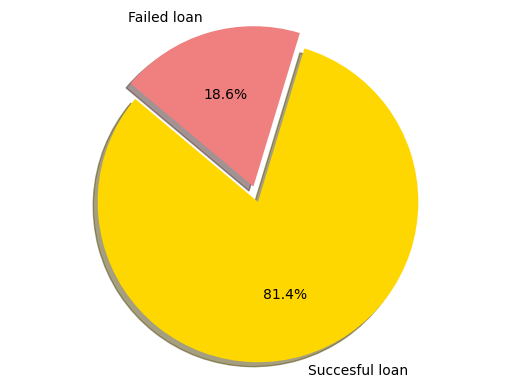

In [18]:
labels = 'Succesful loan', 'Failed loan'
sizes = df_lend['failed_loan'].value_counts()
print(type(sizes), sizes)
sizes = [sizes[1], sizes[-1] ]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)
# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot_ = plt.axis('equal')

Note that there is a significant disporportion of positive labels to negative ones, making the dataset **unbalanced**. This can have drastic consequences for a classifier.

We can also plot the histogram of:
$$\frac{loan-funded}{loan}\geq0.05$$ 

0.07701981762404166
0.1997447197699951


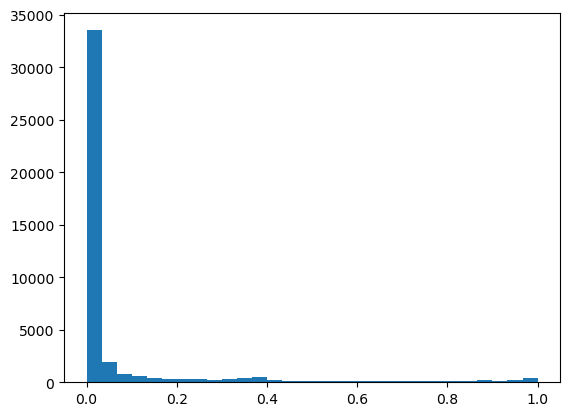

In [20]:
loan = df_lend['loan_amnt'].values
funded = df_lend['funded_amnt_inv'].values
targets = np.abs(loan-funded)/loan
#cleaning data for histo
wrk_records = np.where(~np.isnan(targets))
targets_clean = targets[wrk_records]
#ploting and calculating stats
plt.hist(targets_clean,bins=30)
print (np.mean(targets_clean))
print (np.std(targets_clean))

We observe that the mean is 0.07 which means that in average loan and funded are really close to each other. This explains why our **failed loan** variable has so few "-1" values. As a result, the vast mayority of our data contains succesful loans.

# Step 2: Select your model


- We have 42,537 samples that contain 13 features (loan term, interest rate, employment length, annual income, etc)  each: feature matrix
- We have calculated the "ground truth" for each of these samples: (-1) if the loan failed and (+1) otherwise: label vector.
- As a result, our problem is a binary classification task. 
- There are many algorithms that are designed for classification tasks. 
- We will just start by picking one, later in the course we will see how to select a good one for our problem.

A well known clustering algorithm is the k-nearest neighbor algorithm. Below a quick introduction. For more details about this algorithm, see pages 462-470 in Python for Data Science Handbook by Jake VanderPlas.

### What is K-Nearest Neighbor?

This algorithm, when used for classification, uses the neighboring values of a particular input value to make a prediction. The input is assigned to the class most common among its $k$ nearest neighbors where $k\in\mathbf{R}$. The parameter $k$ is defined in the beginning as a hyperparameter, or a configuration that is prior to the model fit and is not estimated from the data but can be tuned to be more beneficial to the fitting of the model on the data. Determining the distance between the input value and other values is commonly done by Euclidean distance for continuous variables or Hamming distance for discrete variables. We will not go into too much detail here, but we will use this algorithm as a starting example on sklearn. For more information on sklearn's package, see the <a href='http://scikit-learn.org/stable/modules/neighbors.html#neighbors'>sklearn.neighbors documentation.</a>

One thing to note is this algorithm is computation heavy. This is because it must hold all other values in memory in order to measure the closest $k$ values to the input value.

Note that we are loading preprocess ready to use values for $\mathbf{X}$, our feature matrix and $\mathbf{y}$, our label vector. The code to obtain these preprocess data is on a separate notebook.  

## loading our previously preprocess data (X,y), load complete or small depending of your computer speed

In [24]:
from sklearn import neighbors
#from sklearn import datasets
import pickle

# if the model takes too long to fit, try this reduced version of the data (only 4K samples)
##ofname = open('../Data/dataset_small.pkl','rb') 

ofname = open('../Data/dataset_complete.pkl','rb') 

(X,y) = pickle.load(ofname, encoding='latin1') #encoding='latin1' added since pkl was created in Python v2.x
print (X.shape)
print (y.shape)
pd.DataFrame(X).tail()

(41394, 15)
(41394,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
41389,5350.0,5350.0,180.57,4000.0,15.00,0.0,1.0,0.1312,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
41390,10000.0,10000.0,345.18,50000.0,7.22,2.0,20.0,0.1470,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
41391,2000.0,2000.0,61.87,150000.0,5.60,0.0,16.0,0.0712,1.0,7.0,1.0,-1.0,-1.0,-1.0,-1.0
41392,6000.0,6000.0,195.28,20000.0,12.90,0.0,6.0,0.1059,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
41393,4400.0,4400.0,141.25,30000.0,3.72,0.0,5.0,0.0964,1.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0


In [25]:
pd.DataFrame(y).tail()

,0
41389,-1.0
41390,-1.0
41391,-1.0
41392,-1.0
41393,-1.0


In [26]:
#Create an instance of K-nearest neighbor classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=11)

#knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)

# Step 3: Training your model
To fit the model, we will use sklearn's object oriented interface. Firstly we create an object, which we name 'model' (<code>knn</code> in our case). We then can use the <code>model.fit</code> method to set the state of the object based on the training data. The data passed to the method must be in a two dimensional numpy array $\mathbf{X}$ of shape(n_samples, n_predictors) holding the feature matrix and a one-dimensinal numpy array $\mathbf{y}$ that holds the response variable values. To view the documentaiton on this method, <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>visit here</a>.

Once you have fit the model using the appropriate parameters passed to the fit method, the new state of the model object is stored in instances attributes with a trailing underscore '\_' (i.e. model.coefficients_). The new state can also be accessed from different methods, where the instance will return the new state in response to a method call (i.e. get_params).

Estimator objects that can generate predictions provide a <code>model.predict</code> method. In the case of regression, model.predict will return the predicted regression values, $\hat{\mathbf{y}}$.

In [28]:
#Train the classifier
knn.fit(X, y)

print("Complete!")

Complete!


# Step 4: Test your model

Sklearn's estimators come with a score method that calculates the accuracy of the model based on the predicted values.

First lets calculate the predicted values of $\mathbf{y}$ using <code>y_pred = knn.predict(X)</code>. Then lets calculate the percentage of time that the model is correct:

$$ \text{Accuracy} = \frac{\text{number of correctly predicted examples}}{\text{total number of examples}}$$


In [30]:
#Compute the prediction according to the model
y_pred = knn.predict(X)

#Compute how many times the model match the real data (ground truth data)
print (len(y))
print (y_pred)
print (y)
count =0.0
for i in range(len(y)):
    if y[i]==y_pred[i]:
        count = count+1
        #print "match"
print (count)
print ("Prediction match the ground truth (model is correct)", count/len(y)*100, "%")


41394
[1. 1. 1. ... 1. 1. 1.]
[ 1.  1.  1. ... -1. -1. -1.]
35224.0
Prediction match the ground truth (model is correct) 85.09445813402908 %


We can achieve the same result by simply using the build-in function <code>.score</code>

In [32]:
knn.score(X,y)

0.8509445813402908

This value means that 85.1% of the time the model is correct! Is this accuracy really a good result? To undertand a bit better the problem, lets look at the labeled vector $\mathbf{y}$

[33768, 7626]


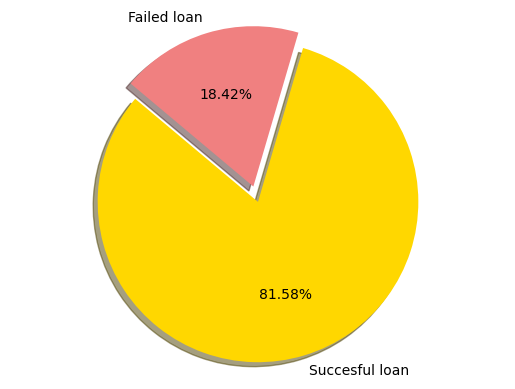

In [34]:
labels = 'Succesful loan', 'Failed loan'
#sizes = df_lend['failed_loan'].value_counts()

# np.where(condition, val if true, val if false)
sizes = [np.sum(np.where(y==1,1,0)), np.sum(np.where(y==-1,1,0))]
print (sizes)
colors = ['gold', 'lightcoral']
explode = (0.1, 0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
 
ply_ = plt.axis('equal')

This unbalanced labeling means that if we <b>always</b> predicted the loan will be a **failed loan**, we would be correct 81.57% of the time, very very close to the accuracy of our model. This demonstrates that accuracy may not be the best metric for understanding the the predictive power of our classifier. A better metric is the <i>confusion matrix</i>.

<table style='border-style : hidden'>
    <tr>
        <th></th>
        <th>Positive</th>
        <th>Negative</th>
        <th></th>
    </tr>
    <tr>
        <th>Positive</th>
        <td>TP: True Positive, when correctly predicted positively</td>
        <td>FP: False Positive, when incorrectly predicted positively</td>
        <td>$\to$Precision $\frac{TP}{TP+FP}$</td>
    </tr>
    <tr>
        <th>Prediction Negative</th>
        <td>FN: False Negative, when incorrectly predicted negative</td>
        <td>TN: True Negative, when correctly predicted negative</td>
        <td>$\to$Negative Predictive Value $\frac{TN}{TN+FN}$</td>
    </tr>
    <tr>
        <th></th>
        <td>$$\downarrow$$Sensitivity (Recall) $\frac{TP}{TP+FN}$</td>
        <td>$$\downarrow$$Specificity $\frac{TN}{TN+FP}$</td>
        <th></th>
    </tr>
<table>

<br>
$$\text{accuracy: }=\frac{TP+TN}{TP+TN+FP+FN}$$

$$\text{sensitivity or recall: }=\frac{TP}{Real Positives}=\frac{TP}{TP+FN}$$

$$\text{specificity: }=\frac{TN}{Real Negatives}=\frac{TN}{TN+FP}$$

$$\text{precision (positive predictive value): }=\frac{TP}{Predicted Positives}=\frac{TP}{TP+FP}$$

$$\text{negative predictive value: }=\frac{TN}{Predicted Negatives}=\frac{TN}{TN+FN}$$

We can calculate the confusion matrix as follow:

In [37]:
confusion_matrix = dict()
confusion_matrix['TP'] = np.sum(np.logical_and(y_pred==-1,y==-1))
confusion_matrix['TN'] = np.sum(np.logical_and(y_pred==1,y==1))
confusion_matrix['FP'] = np.sum(np.logical_and(y_pred==-1,y==1))
confusion_matrix['FN'] = np.sum(np.logical_and(y_pred==1,y==-1))
pd.DataFrame(data=confusion_matrix, index=['results'])

,TP,TN,FP,FN
results,1522,33702,66,6104


Sklearn also has a method for this to make calculation easier. For a more elaborate example of how to use this, <a href='http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py'>visit here</a>.

In [39]:
from sklearn import metrics
metrics.confusion_matrix(y_pred,y)

array([[ 1522,    66],
       [ 6104, 33702]])

Lets try now a different number of k=neighbors for our model. Lets try with k=1:

In [41]:
#Train a classifier using .fit()
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
y_pred=knn.predict(X)

print ("classification accuracy:", metrics.accuracy_score(y_pred, y))
print ("confusion matrix: \n" + str(metrics.confusion_matrix(y_pred, y)))

classification accuracy: 0.8509445813402908
confusion matrix: 
[[ 1522    66]
 [ 6104 33702]]


In [42]:
#Train a classifier using .fit()
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)

print ("classification accuracy:", metrics.accuracy_score(y_pred, y))
print ("confusion matrix: \n" + str(metrics.confusion_matrix(y_pred, y)))

classification accuracy: 1.0
confusion matrix: 
[[ 7626     0]
 [    0 33768]]


Why do you think that we get perfect classification if we use only one neighbor?

# Dividing data for training and testing
We have previously used full dataset for fitting the model and evaluating the model, this is not good practice. It is better practice to use a subset of the data to train on and then test the accuracy of your model with a smaller subset of data that was not part of your training dataset. This is because we want to compare the <i>in-sample error rate</i> $E_{in}$ or the error on values in the training set and <i>out of sample error</i> $E_{out}$ which is the generalization error on unseen data, or our test set.

$$E_{in}=\frac{1}{N}\sum_{i=1}^{N}e(x_i, y_i)$$
$$E_{out}=E_{xy}(e(x,y))$$
$$\text{ where } e(x_i, y_i)=I[h(x)=y_i]= 
\begin{cases}
    1     & \quad \text{if } h(x_i)=y\\
    0 & \quad \text{otherwise }
  \end{cases}$$
$$\text{observe that }E_{out}\geq E_{in}$$

<p style="font-size: 16px">The goal of model learning is to minimize the genearalization error. Desirable:</p>
<li>$E_{in}\to 0$</li>
<li>$E_{out}\approx E_{in}$</li>

Up to this point we used training data for "assessing" the performance of the method, as we will see later this is a bad practice. Let us simulate the exploitation stage by holding out a subset of the training data and assess the performance on that set. 

We can use the validation process for model selection.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split splits the data into random subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=y.size)  
print('Training shape: {}, training targets shape: {}'.format(X_train.shape, y_train.shape))
print('Testing shape: {}, testing targets shape: {}'.format(X_test.shape, y_test.shape))

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

#Check on the training set and visualize performance
y_pred_train =knn.predict(X_train)
y_pred_test = knn.predict(X_test)

results = dict()
train_cm = metrics.confusion_matrix(y_train, y_pred_train)
results['Training'] = {'classification_acc': accuracy_score(y_pred_train, y_train),
                      'TP': train_cm[0,0], 'FP': train_cm[0,1],
                      'FN': train_cm[1,0], 'TN': train_cm[1,1]}

test_cm = metrics.confusion_matrix(y_test, y_pred_test)
results['Test'] = {'classification_acc': accuracy_score(y_pred_test, y_test),
                      'TP': test_cm[0,0], 'FP': test_cm[0,1],
                      'FN': test_cm[1,0], 'TN': test_cm[1,1]}

pd.DataFrame(data=results)


Training shape: (28975, 15), training targets shape: (28975,)
Testing shape: (12419, 15), testing targets shape: (12419,)


,Training,Test
classification_acc,1.0,0.760367
TP,5344.0,795.000000
FP,0.0,1487.000000
FN,0.0,1489.000000
TN,23631.0,8648.000000


As we will see in our next Notebook, we can use the validation process for model selection.

# References

1. Deep Learning, https://arxiv.org/pdf/1404.7828.pdf
2. Pytorch, Deep Learning Python Library, https://pytorch.org
3. Scikit-Learn, Python Library for Machine Learning, http://scikit-learn.org/stable/index.html
4. Next Generation AI: Common Sense, https://www.youtube.com/watch?time_continue=2564&v=7ROelYvo8f0

_Last updated on 9.5.25 23:18pm<br>
(C) 2025 Complex Adaptive Systems Laboratory, all rights reserved._